<a href="https://colab.research.google.com/github/jamessmathew/Dendrite.AI-Assesment/blob/main/Screening_Test_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As part of the screening test, you will write code to parse the JSON file provided(algoparams_from_ui) and kick off in sequence the following machine learning steps programmatically. Keep in mind your final code should be able to parse any Json that follows this format. It is crucial you have a generic parse that can read the various steps like feature handling, feature generation and model building using Grid search after parsing hyper params.




In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/jamessmathew/Dendrite.AI-Assesment/main/iris.csv")

In [ ]:
k4jadf.tail().T
I?"KO"

SyntaxError: ignored

In [ ]:
8+dqaw}sadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


1) Read the target and type of regression to be run[link text](https://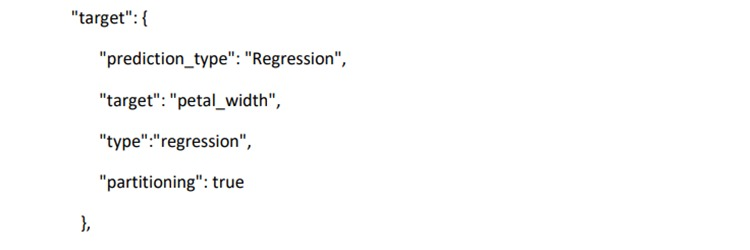)

In [ ]:
import json

config = {
    "prediction_type": "Regression",
    "target": "petal_width",
    "type": "regression",
    "partitioning": True
}

target = config['target']
reg_type = config['type']
partitioning = config['partitioning']

print("Target:", target)
print("Regression Type:", reg_type)
print("Partitioning:", partitioning)


Target: petal_width
Regression Type: regression
Partitioning: True


In [ ]:
import pandas as pd

feature_config = {
    "sepal_length": {
        "feature_name": "sepal_length",
        "is_selected": True,
        "feature_variable_type": "numerical",
        "feature_details": {
            "numerical_handling": "Keep as regular numerical feature",
            "rescaling": "No rescaling",
            "make_derived_feats": False,
            "missing_values": "Impute",
            "impute_with": "Average of values",
            "impute_value": None
        }
    }
}

df = pd.read_csv("https://raw.githubusercontent.com/jamessmathew/Dendrite.AI-Assesment/main/iris.csv")

for feature, config in feature_config.items():
    if config['missing_values'] == 'Impute':
        impute_with = config['impute_with']
        if impute_with == 'Average of values':
            mean = df[feature].mean()
            df[feature].fillna(mean, inplace=True)



KeyError: ignored

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
x = df.drop(['petal_width','species'],axis=1)

In [ ]:
x.shape

(150, 3)

In [ ]:
y=np.sqrt(df['petal_width'])

In [ ]:
y.shape

(150,)

In [ ]:
#spliting

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [ ]:
X_train.shape

(112, 3)

In [ ]:
y_train.shape

(112,)

In [ ]:
#Creating the model
knn = LinearRegression
knn.fit(X_train, y_train)

TypeError: ignored

2) Read the features (which are column names in the csv) and figure out what missing imputation needs to be applied and apply that to the columns loaded in a dataframe

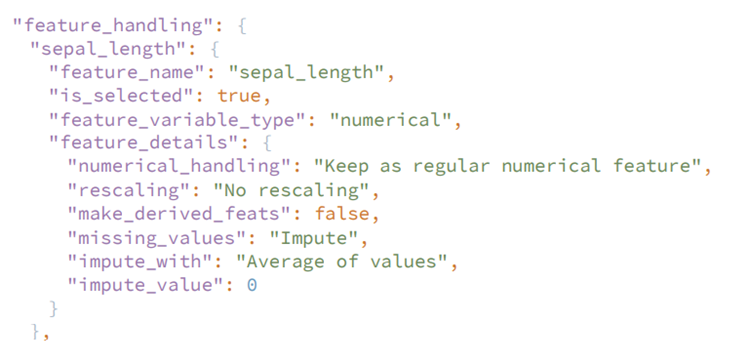

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

3) Compute feature reduction based on input. See the screenshot below where there can be No Reduction, Corr with Target, Tree-based, PCA. Please make sure you write code so that all options can work. If we rerun your code with a different Json it should work if we switch No Reduction to say PCA.

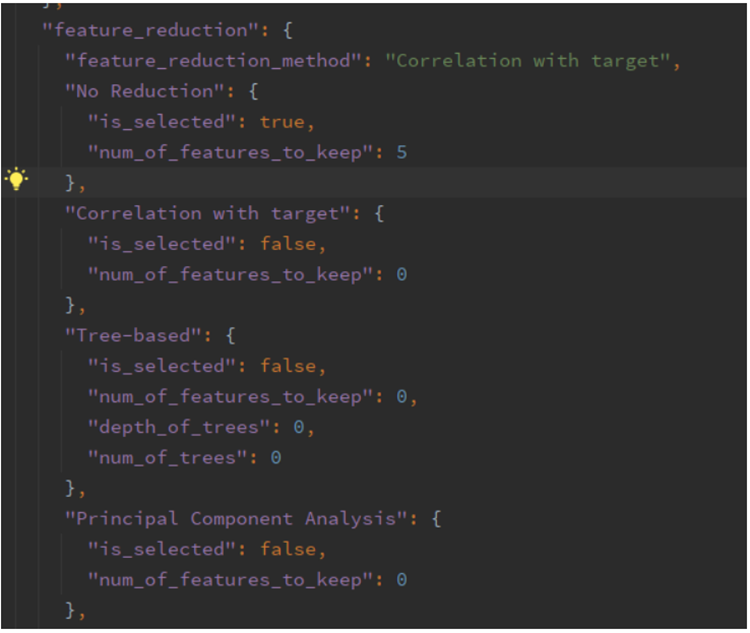

4) Parse the Json and make the model objects (using sklean) that can handle what is required in the “prediction_type” specified in the JSON (See #1 where “prediction_type” is specified). Keep in mind not to pick models that don’t apply for the prediction_type specified

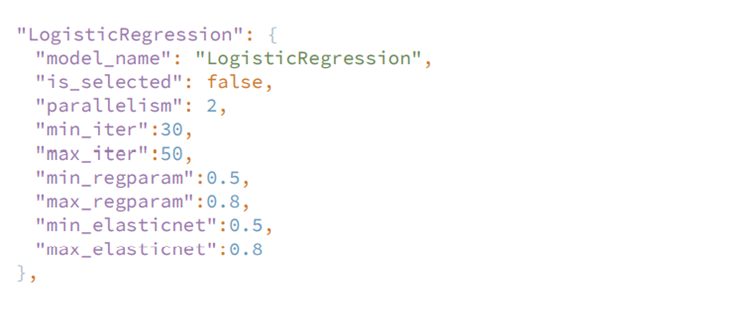

5) Run the fit and predict on each model – keep in mind that you need to do hyper parameter tuning i.e., use GridSearchCV

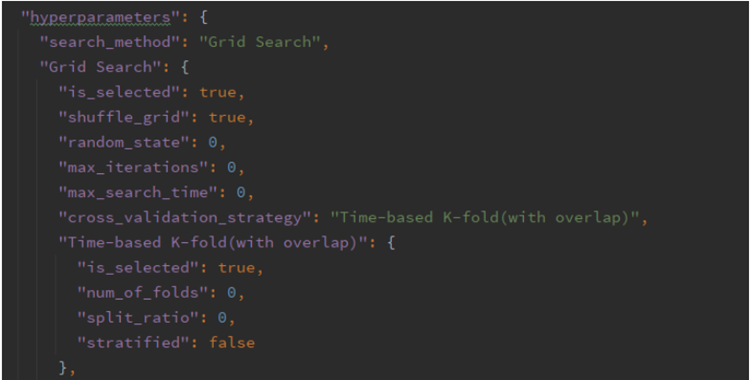

6) Log to the console the standard model metrics that apply